In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
d=pd.read_csv('suv_data.csv')
d

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,0.0
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0
...,...,...,...,...,...
395,15691863.0,Female,46.0,41000.0,1.0
396,15706071.0,Male,51.0,23000.0,1.0
397,15654296.0,Female,50.0,20000.0,1.0
398,15755018.0,Male,36.0,33000.0,0.0


In [3]:
d.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
d.Purchased.unique()

array([0., 1.])

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    float64
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


# EDA

<Axes: xlabel='Gender', ylabel='count'>

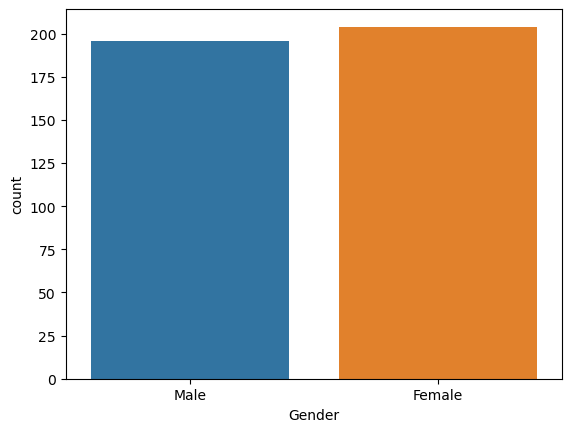

In [7]:
sns.countplot(x='Gender', data=d)

In [8]:
d_float=list(d.select_dtypes(float).columns)
d_float

['User ID', 'Age', 'EstimatedSalary', 'Purchased']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

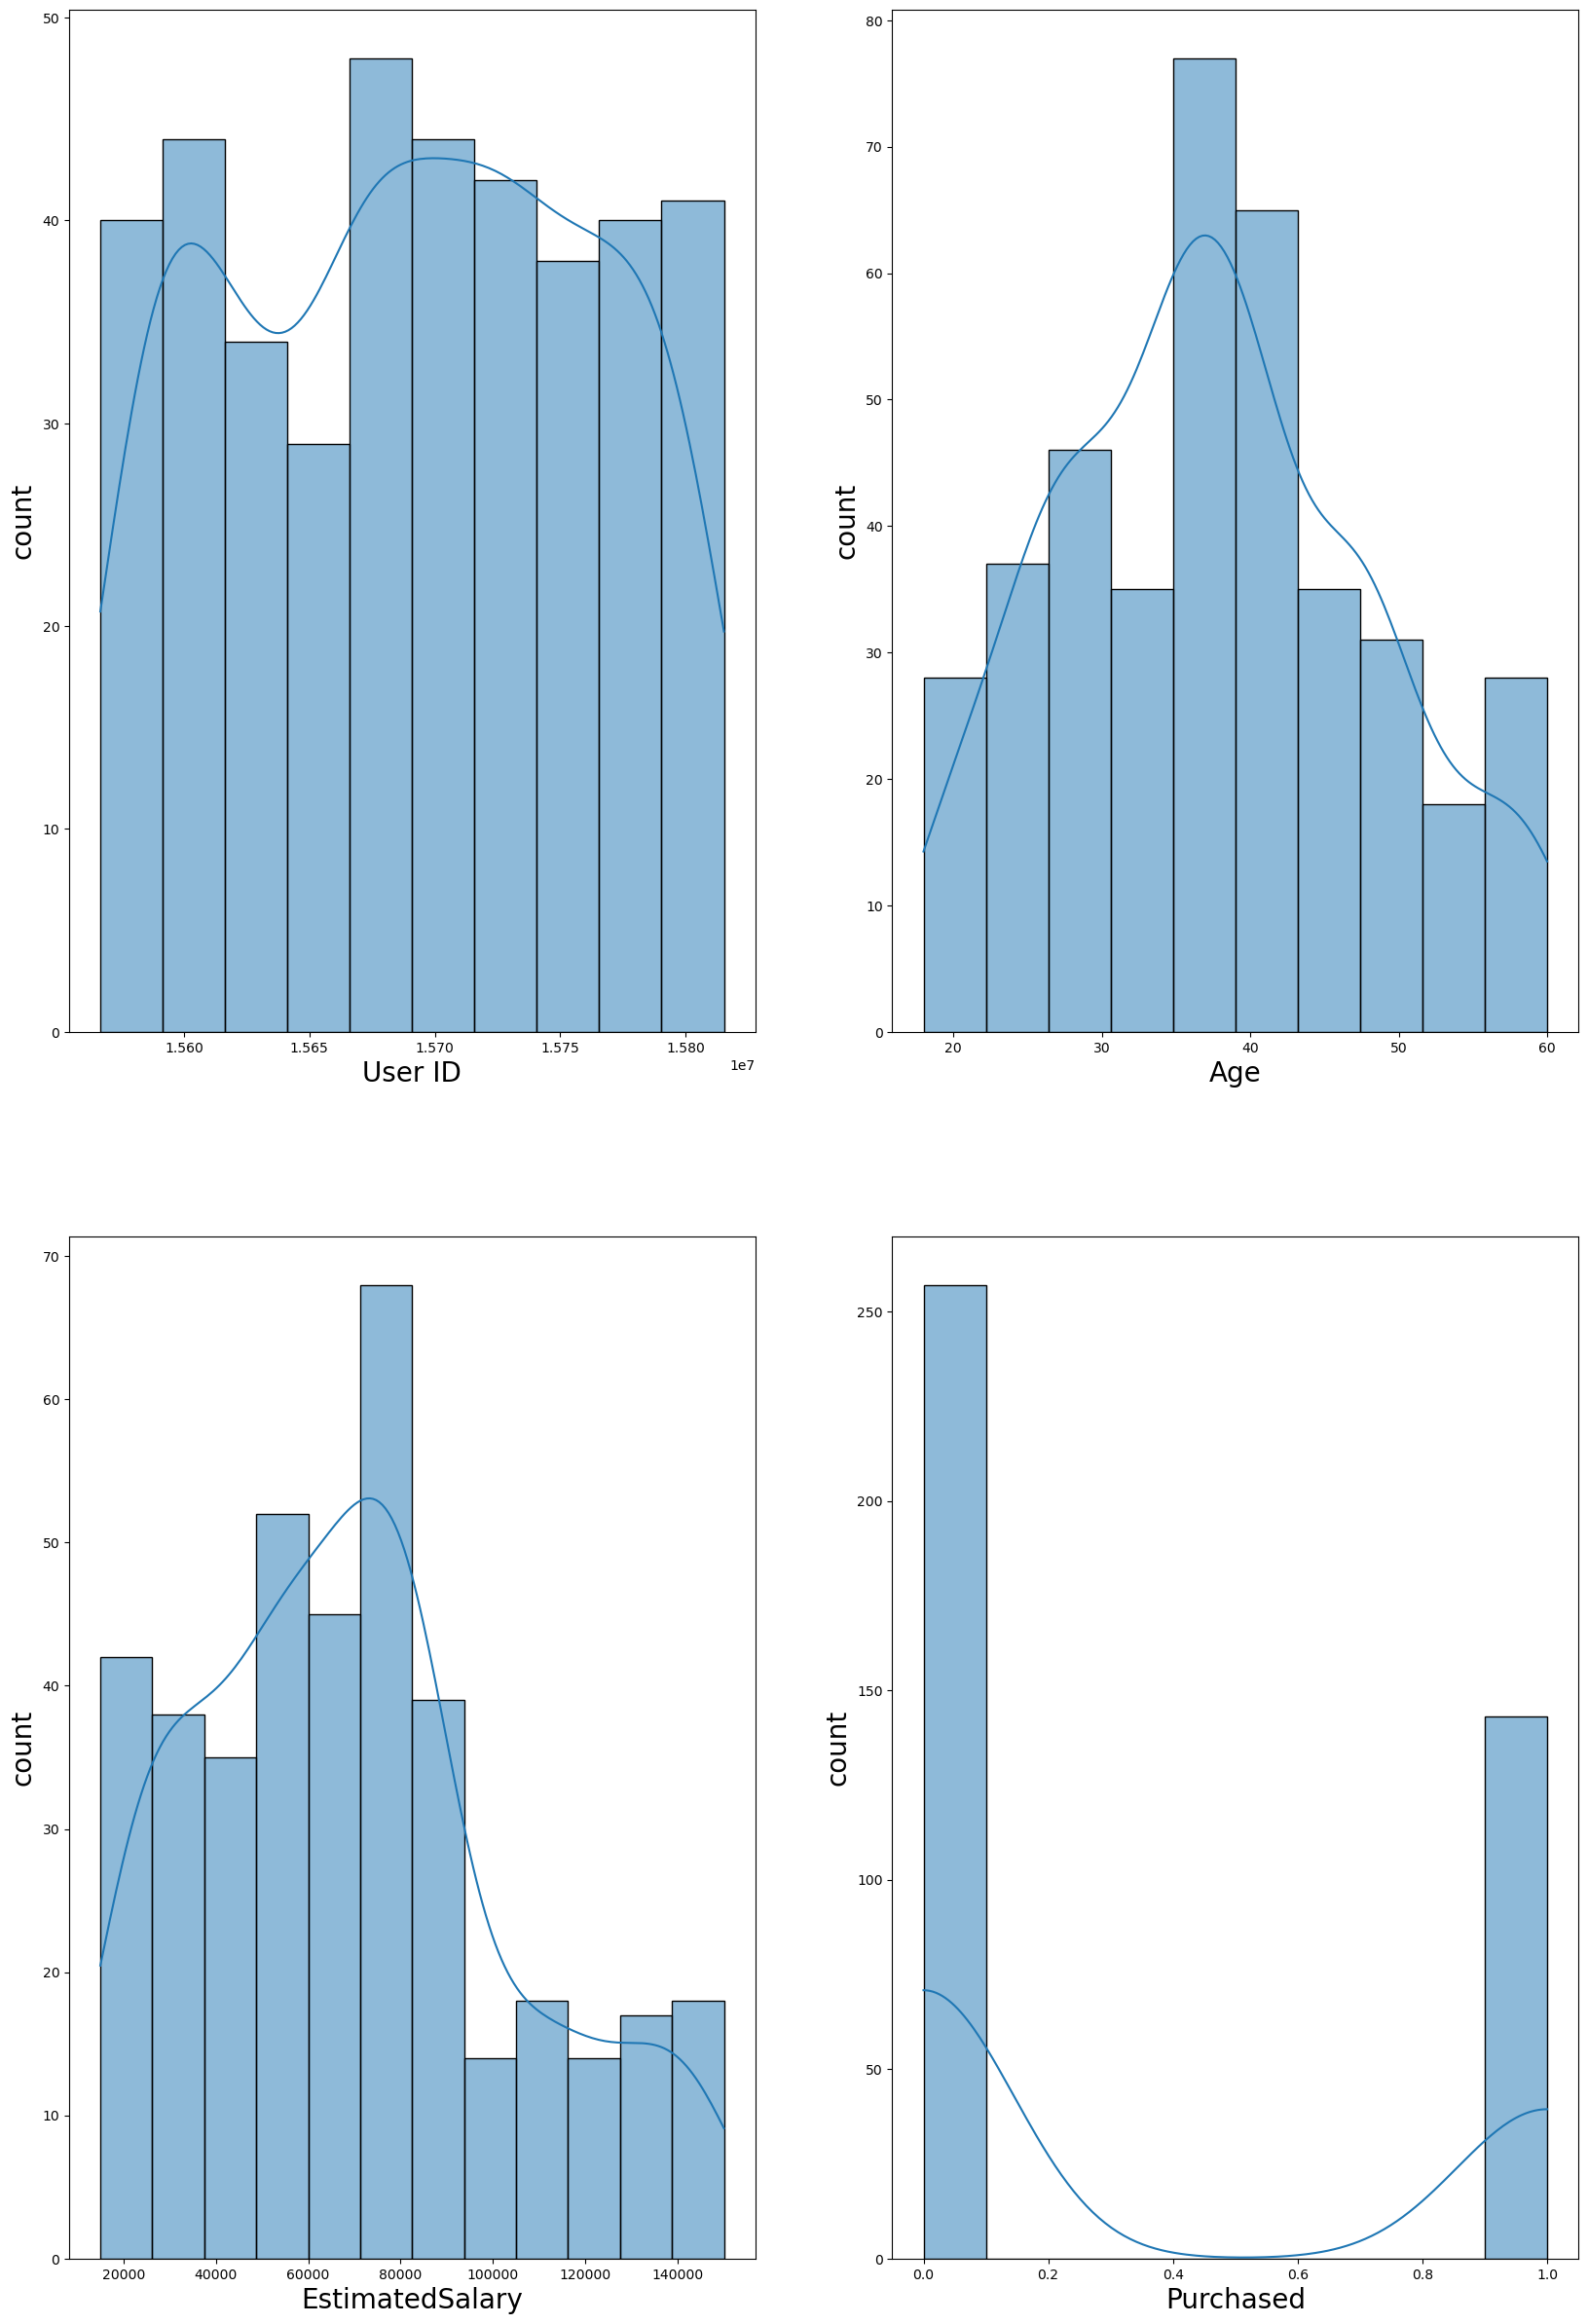

In [9]:
plt.figure(figsize=(20,30))
plot=1
for col in d_float:
    if plot<=5:
        ax=plt.subplot(2,2,plot)
        sns.histplot(d[col],kde=True)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout

In [12]:
d1=d[['User ID', 'Age', 'EstimatedSalary']]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

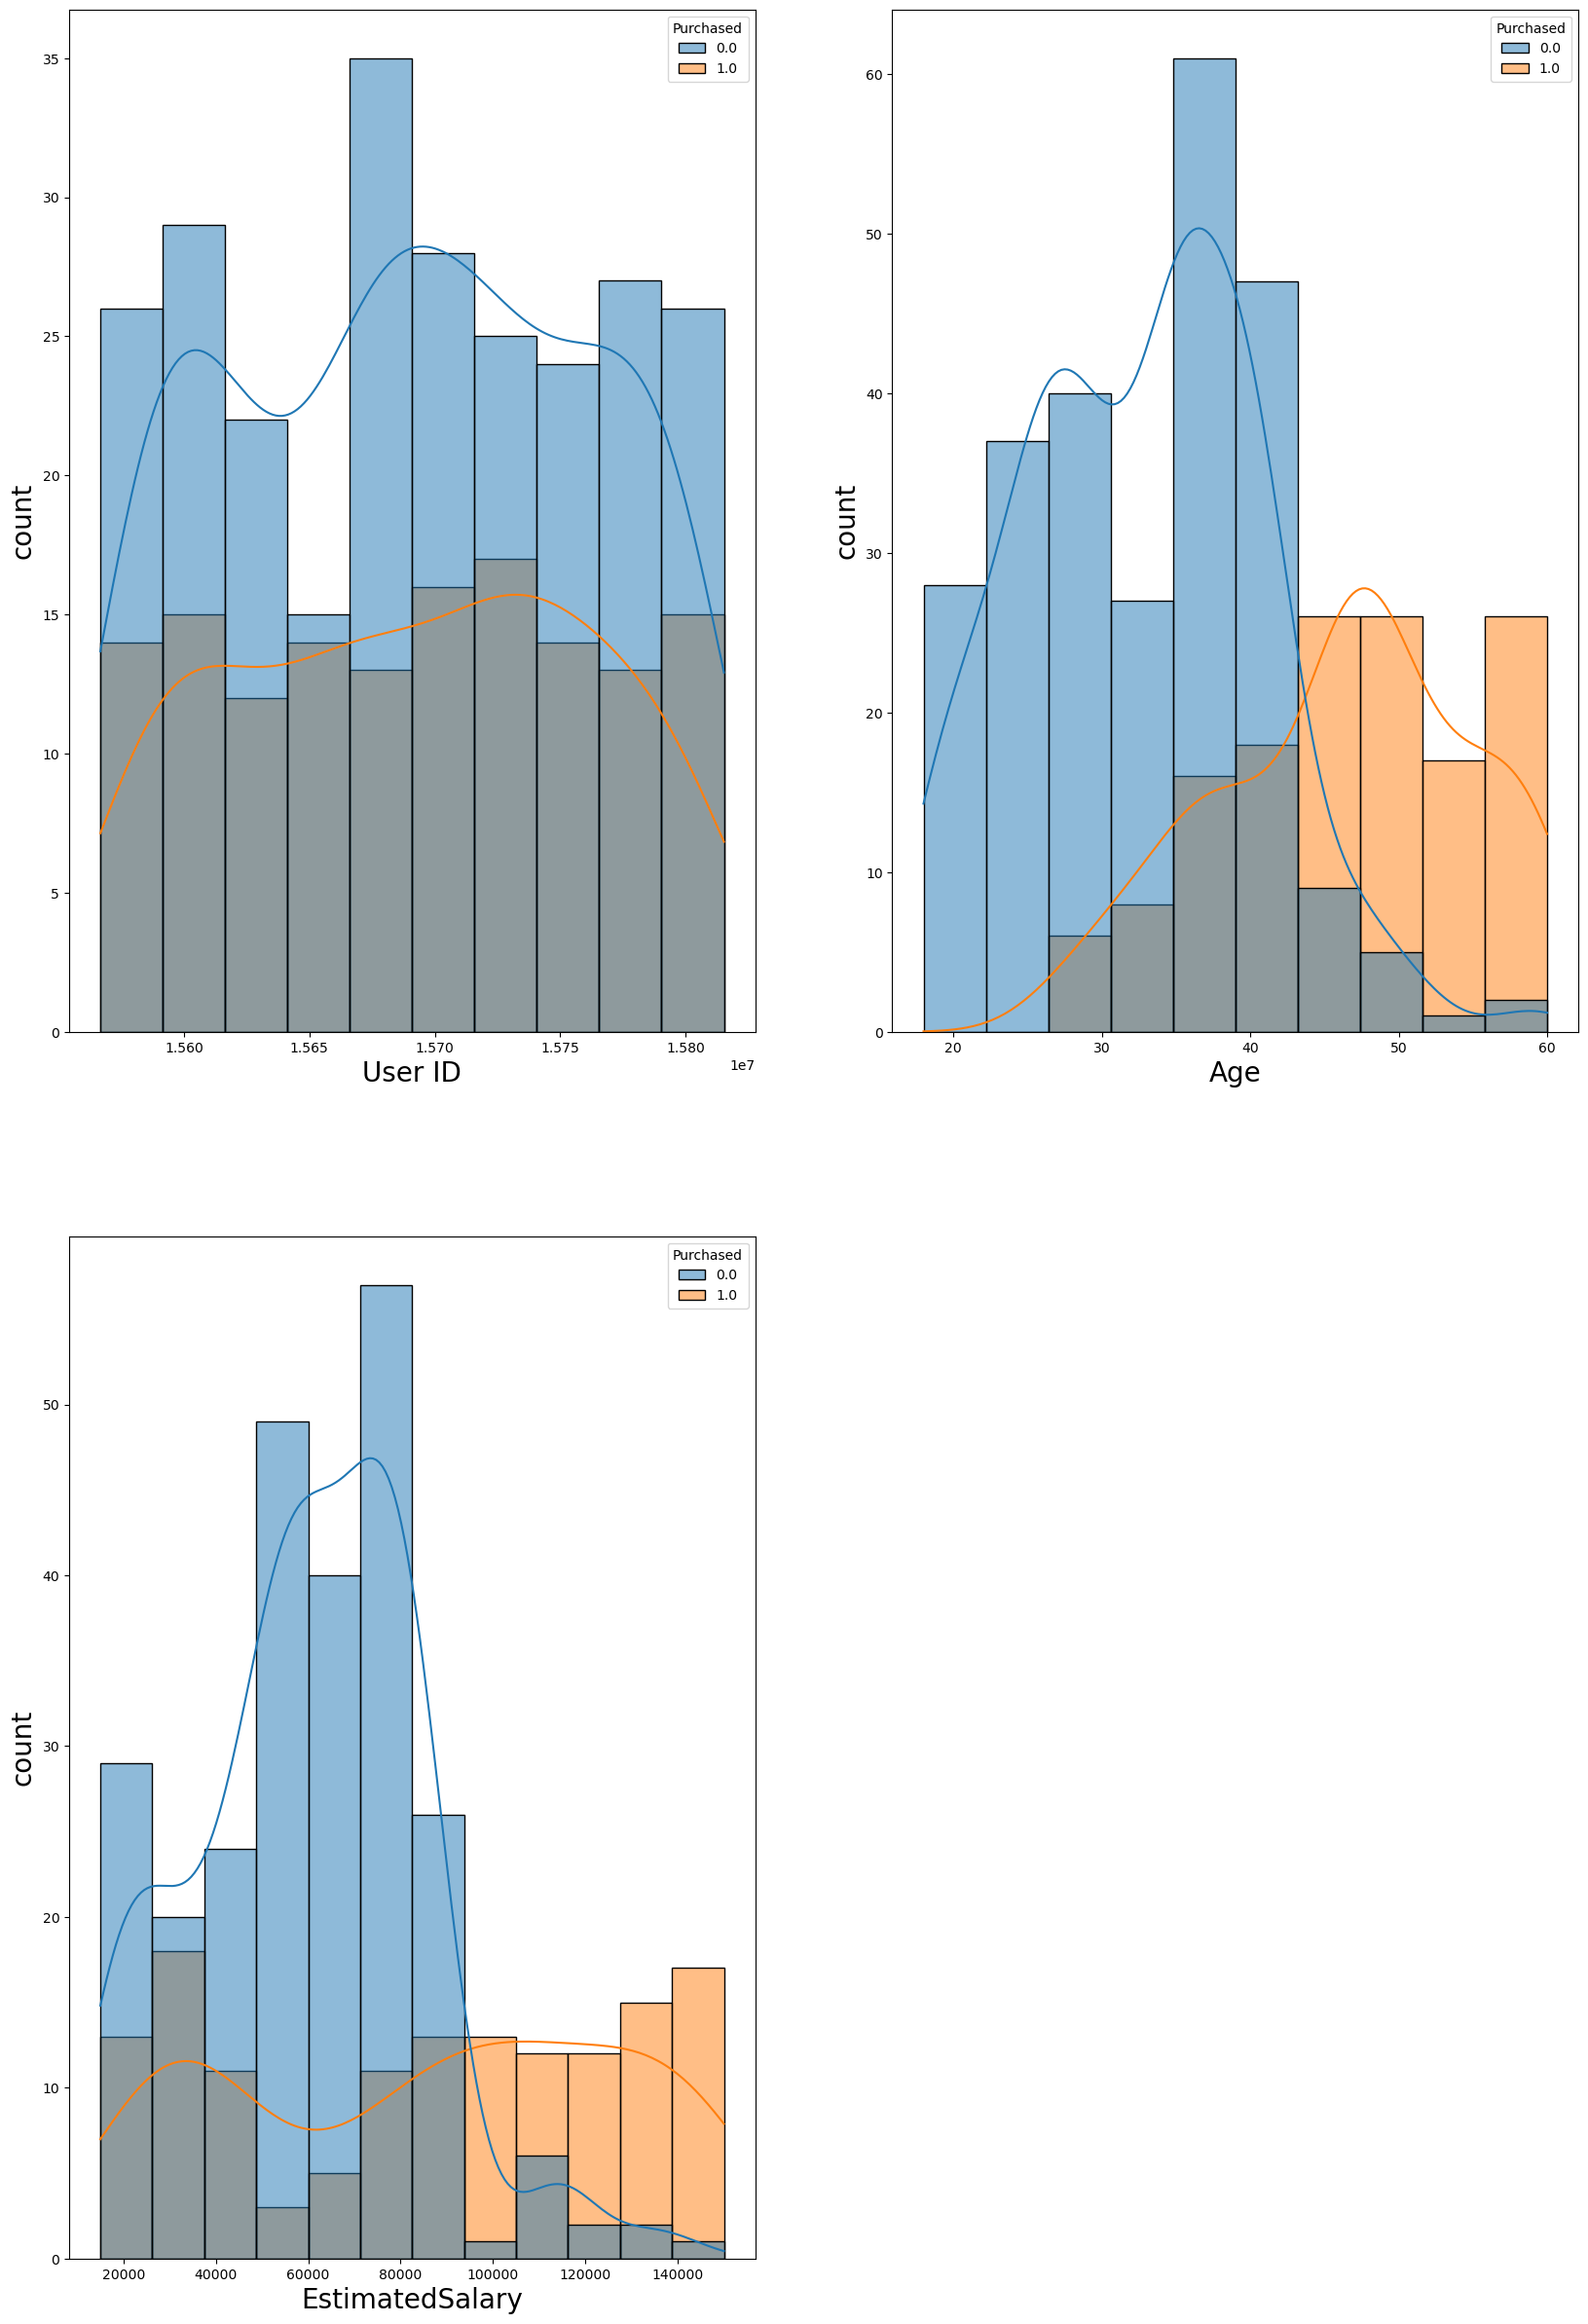

In [13]:
plt.figure(figsize=(20,30))
plot=1
for col in d1:
    if plot<=5:
        ax=plt.subplot(2,2,plot)
        sns.histplot(x=d1[col],kde=True,hue=d.Purchased)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout

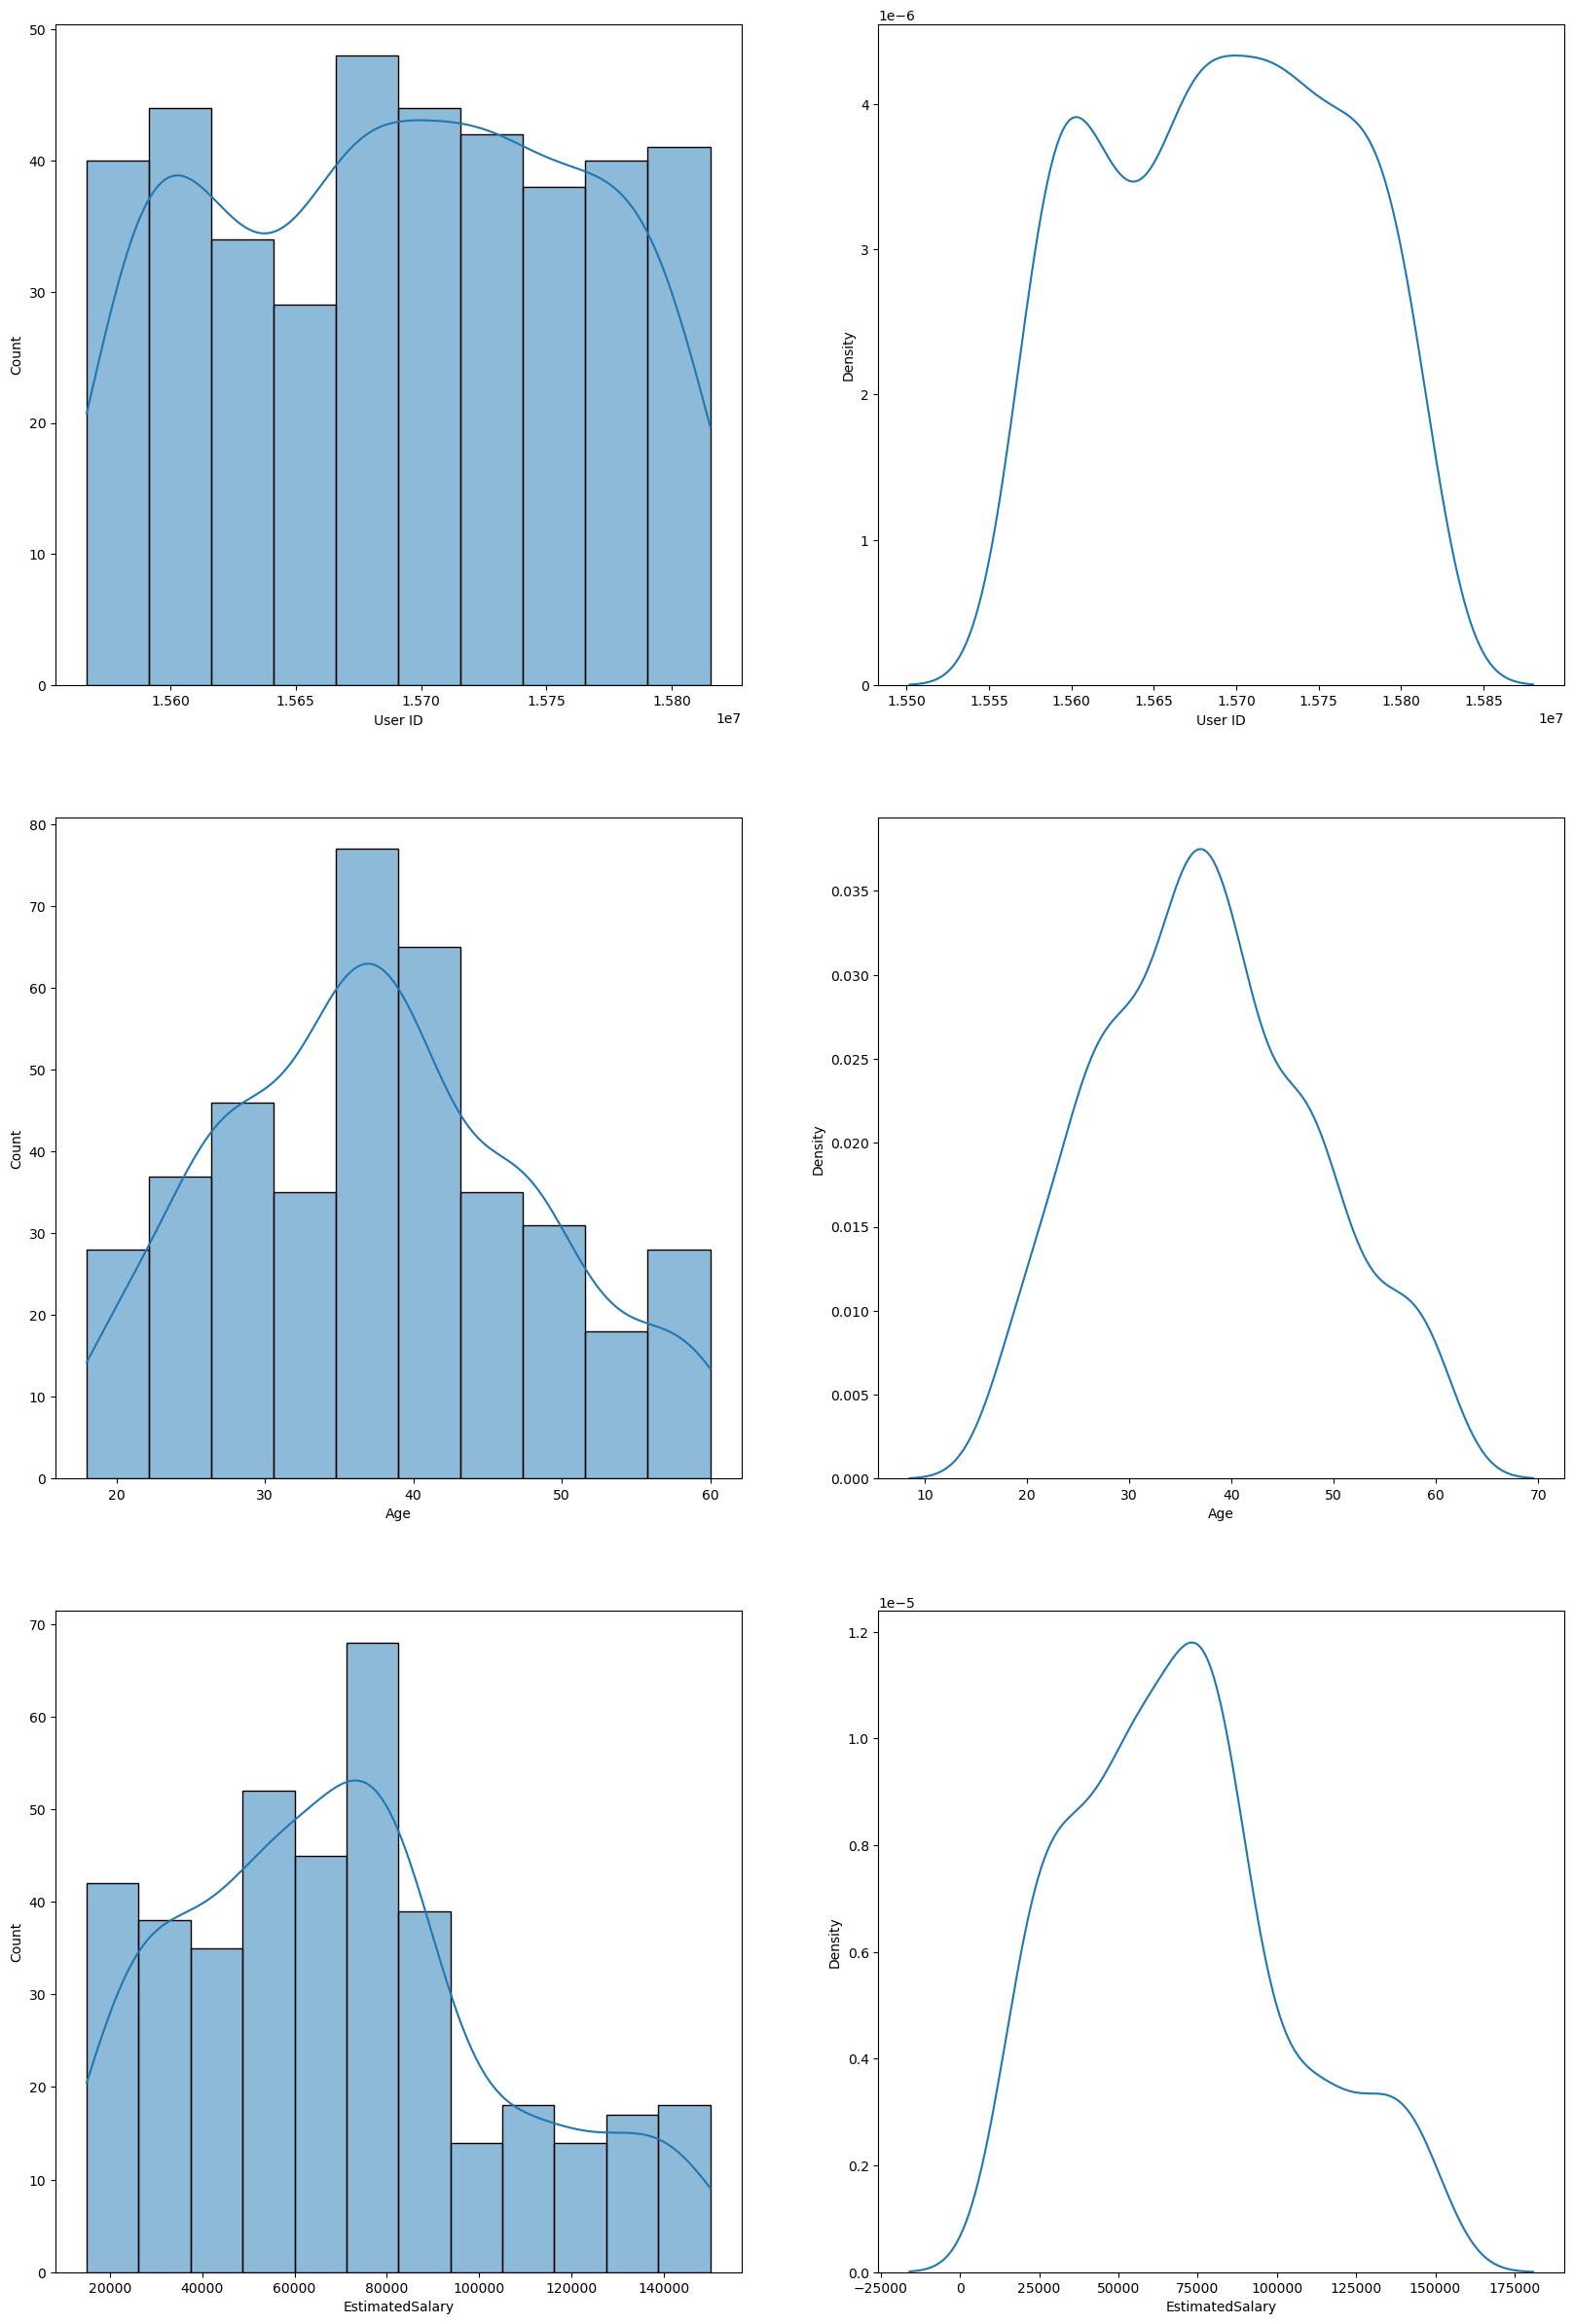

In [14]:
fig,ax=plt.subplots(3,2,figsize=(20,30))
m,n=0,0
for col in d1:
    sns.histplot(d[col], kde= True, ax=ax[m][n])
    sns.distplot(d[col],hist=False, ax=ax[m][n+1])
    m+=1

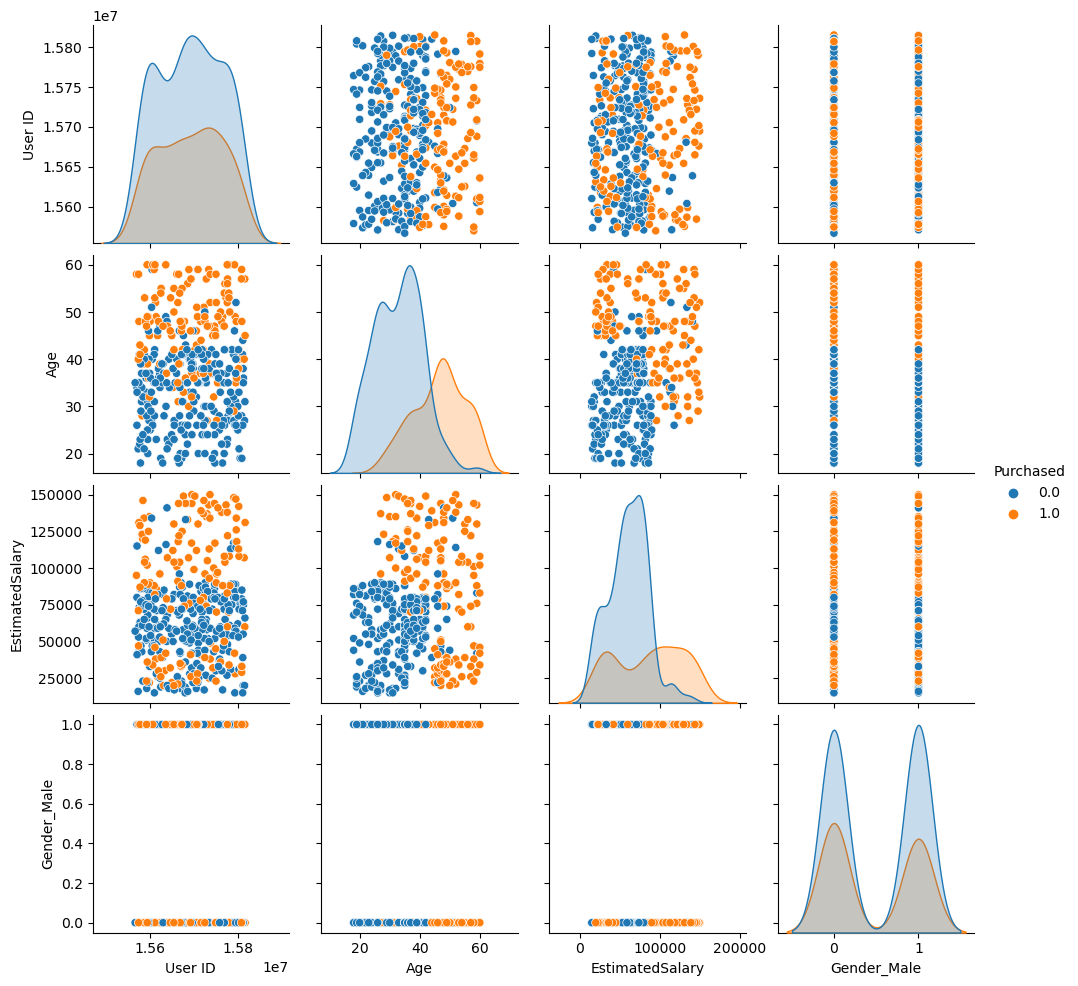

In [20]:
sns.pairplot(data=d,hue='Purchased')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

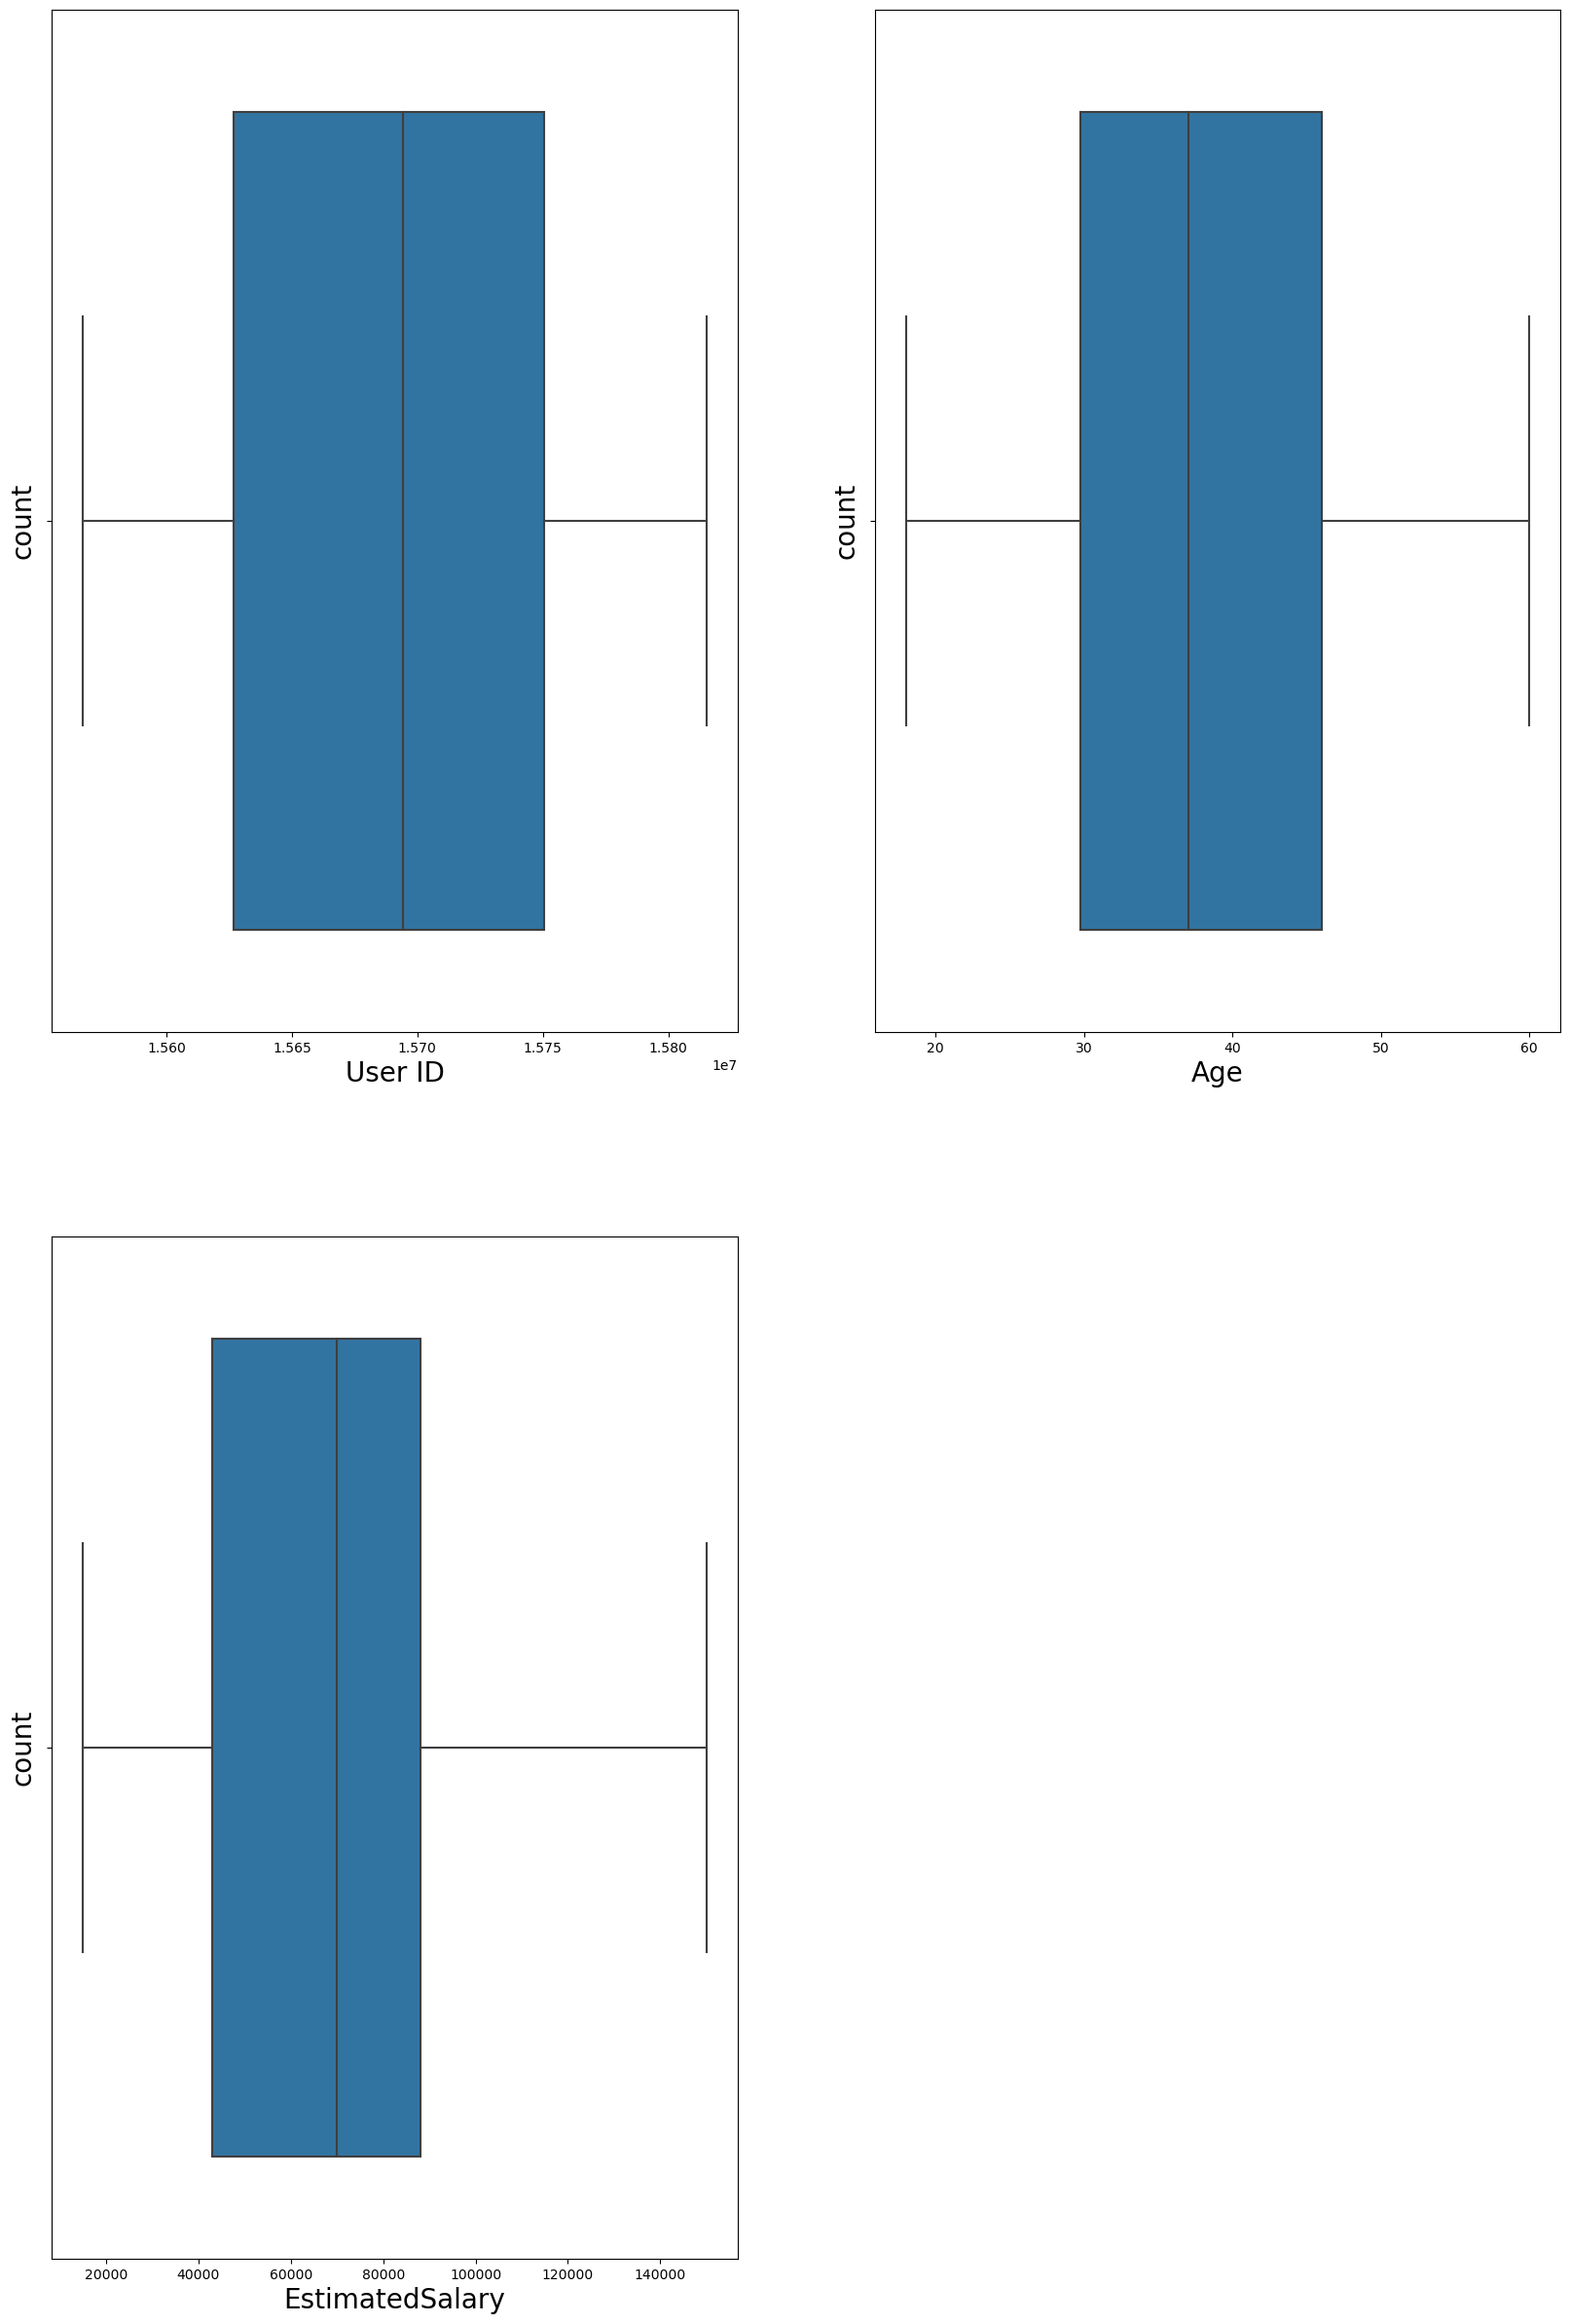

In [15]:
plt.figure(figsize=(20,30))
plot=1
for col in d1:
    if plot<=5:
        ax=plt.subplot(2,2,plot)
        sns.boxplot(x=d1[col],hue=d.Purchased)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout

In [16]:
d.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
da=pd.get_dummies(d['Gender'],prefix='Gender',drop_first=True,dtype=int)
d=pd.concat([d,da],axis=1).drop(['Gender'],axis=1)

In [18]:
d

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510.0,19.0,19000.0,0.0,1
1,15810944.0,35.0,20000.0,0.0,1
2,15668575.0,26.0,43000.0,0.0,0
3,15603246.0,27.0,57000.0,0.0,0
4,15804002.0,19.0,76000.0,0.0,1
...,...,...,...,...,...
395,15691863.0,46.0,41000.0,1.0,0
396,15706071.0,51.0,23000.0,1.0,1
397,15654296.0,50.0,20000.0,1.0,0
398,15755018.0,36.0,33000.0,0.0,1


In [21]:
d.corr()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,-0.042469
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,1.000000


<Axes: >

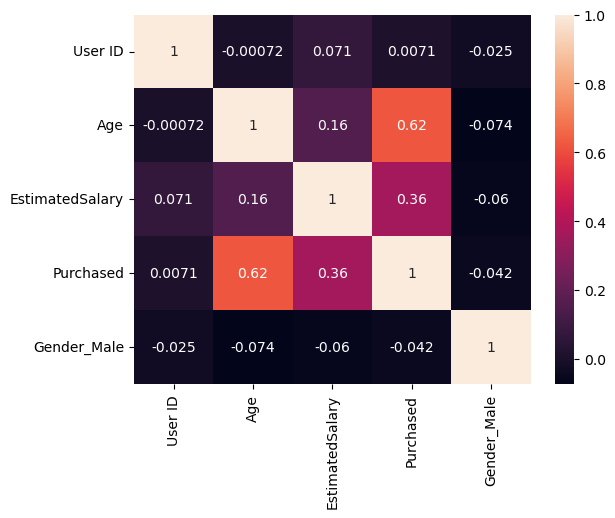

In [22]:
sns.heatmap(d.corr(),annot=True)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
d[['Age','Gender_Male','EstimatedSalary']]=sc.fit_transform(d[['Age','Gender_Male','EstimatedSalary']])

In [30]:
d

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510.0,-1.781797,-1.490046,0.0,1.020204
1,15810944.0,-0.253587,-1.460681,0.0,1.020204
2,15668575.0,-1.113206,-0.785290,0.0,-0.980196
3,15603246.0,-1.017692,-0.374182,0.0,-0.980196
4,15804002.0,-1.781797,0.183751,0.0,1.020204
...,...,...,...,...,...
395,15691863.0,0.797057,-0.844019,1.0,-0.980196
396,15706071.0,1.274623,-1.372587,1.0,1.020204
397,15654296.0,1.179110,-1.460681,1.0,-0.980196
398,15755018.0,-0.158074,-1.078938,0.0,1.020204


In [31]:
x=d[['Age','Gender_Male','EstimatedSalary']]
y=d['Purchased']

In [32]:
x

,Age,Gender_Male,EstimatedSalary
0,-1.781797,1.020204,-1.490046
1,-0.253587,1.020204,-1.460681
2,-1.113206,-0.980196,-0.785290
3,-1.017692,-0.980196,-0.374182
4,-1.781797,1.020204,0.183751
...,...,...,...
395,0.797057,-0.980196,-0.844019
396,1.274623,1.020204,-1.372587
397,1.179110,-0.980196,-1.460681
398,-0.158074,1.020204,-1.078938


In [42]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Purchased, Length: 400, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
x_train.shape

(320, 3)

In [45]:
y_train.shape
y_train

3      0.0
18     1.0
202    1.0
250    0.0
274    1.0
      ... 
71     0.0
106    0.0
270    0.0
348    0.0
102    0.0
Name: Purchased, Length: 320, dtype: float64

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [50]:
y_pred_prob=lr.predict_proba(x_test)
y_pred_prob

array([[0.76217269, 0.23782731],
       [0.02760119, 0.97239881],
       [0.98085995, 0.01914005],
       [0.1562032 , 0.8437968 ],
       [0.98626959, 0.01373041],
       [0.95018963, 0.04981037],
       [0.13492828, 0.86507172],
       [0.92015198, 0.07984802],
       [0.57329487, 0.42670513],
       [0.5593897 , 0.4406103 ],
       [0.86707009, 0.13292991],
       [0.35496578, 0.64503422],
       [0.99164819, 0.00835181],
       [0.99795979, 0.00204021],
       [0.86326899, 0.13673101],
       [0.54256992, 0.45743008],
       [0.36918837, 0.63081163],
       [0.36228467, 0.63771533],
       [0.83032246, 0.16967754],
       [0.08945748, 0.91054252],
       [0.99656483, 0.00343517],
       [0.90638496, 0.09361504],
       [0.65987524, 0.34012476],
       [0.0405955 , 0.9594045 ],
       [0.99806644, 0.00193356],
       [0.47105145, 0.52894855],
       [0.43527057, 0.56472943],
       [0.83358691, 0.16641309],
       [0.01773588, 0.98226412],
       [0.99842806, 0.00157194],
       [0.

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [52]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[50,  2],
       [ 7, 21]], dtype=int64)

In [53]:
recall=recall_score(y_test,y_pred)
recall

0.75

In [54]:
score=accuracy_score(y_test,y_pred)
score

0.8875

In [56]:
precision=precision_score(y_test,y_pred)
precision

0.9130434782608695

In [57]:
f1=f1_score(y_test,y_pred)
f1

0.8235294117647057